In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
df1=pd.read_csv('BHP.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','availability','society'],axis='columns')

In [6]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df2['balcony']=df2['balcony'].fillna(0)

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [10]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,0.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['size']=df3['size'].apply(lambda x: x.split(' ')[0])
df3.head()

C:\Users\abish\AppData\Local\Temp\ipykernel_28616\1143742757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['size']=df3['size'].apply(lambda x: x.split(' ')[0])


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [14]:
df3['bhk']=pd.to_numeric(df3['size'])
df3.head()

C:\Users\abish\AppData\Local\Temp\ipykernel_28616\1642024436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=pd.to_numeric(df3['size'])


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00,4
2,Uttarahalli,3,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00,3
4,Kothanur,2,1200,2.0,1.0,51.00,2


In [15]:
df3.drop('size',axis='columns')
df3

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00,4
2,Uttarahalli,3,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00,3
4,Kothanur,2,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,0.0,231.00,5
13316,Richards Town,4,3600,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4,4689,4.0,1.0,488.00,4


In [16]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def unisqft(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(unisqft)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2,1015 - 1540,2.0,0.0,56.800,2


In [20]:
def avgsqft(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
avgsqft('2100-2200')

2150.0

In [22]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(avgsqft)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,3
4,Kothanur,2,1200.0,2.0,1.0,51.00,2


In [23]:
df5=df4.copy()
df5['price_per_feet']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_feet
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
len(df5.location.unique())

1304

In [25]:
df5.location=df5.location.apply(lambda  x: x.strip())

In [26]:
locationfreq=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
locationfreq

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
len(locationfreq[locationfreq<=10])

1052

In [28]:
location_freq_less10=locationfreq[locationfreq<=10]
location_freq_less10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [29]:
df5.location=df5.location.apply(lambda x:'other' if x in location_freq_less10 else x)

In [30]:
len(df5.location.unique())

242

In [31]:
df5.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_feet
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4,2732.0,4.0,0.0,204.00,4,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,0.0,600.00,4,18181.818182
8,Marathahalli,3,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6,1020.0,6.0,0.0,370.00,6,36274.509804


In [32]:
#outlier removal
df5[df5.total_sqft/df5.bhk<300].head()
df5.shape

(13246, 8)

In [33]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [34]:
#removing extreme cases of price_per_feet
def remove_ppf_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_feet)
        st=np.std(subdf.price_per_feet)
        reduceddf=subdf[(subdf.price_per_feet>(m-st)) & (subdf.price_per_feet<=(m+st))]
        df_out=pd.concat([df_out,reduceddf],ignore_index=True)
    return df_out
df7=remove_ppf_outlier(df6)
df7.shape

(10241, 8)

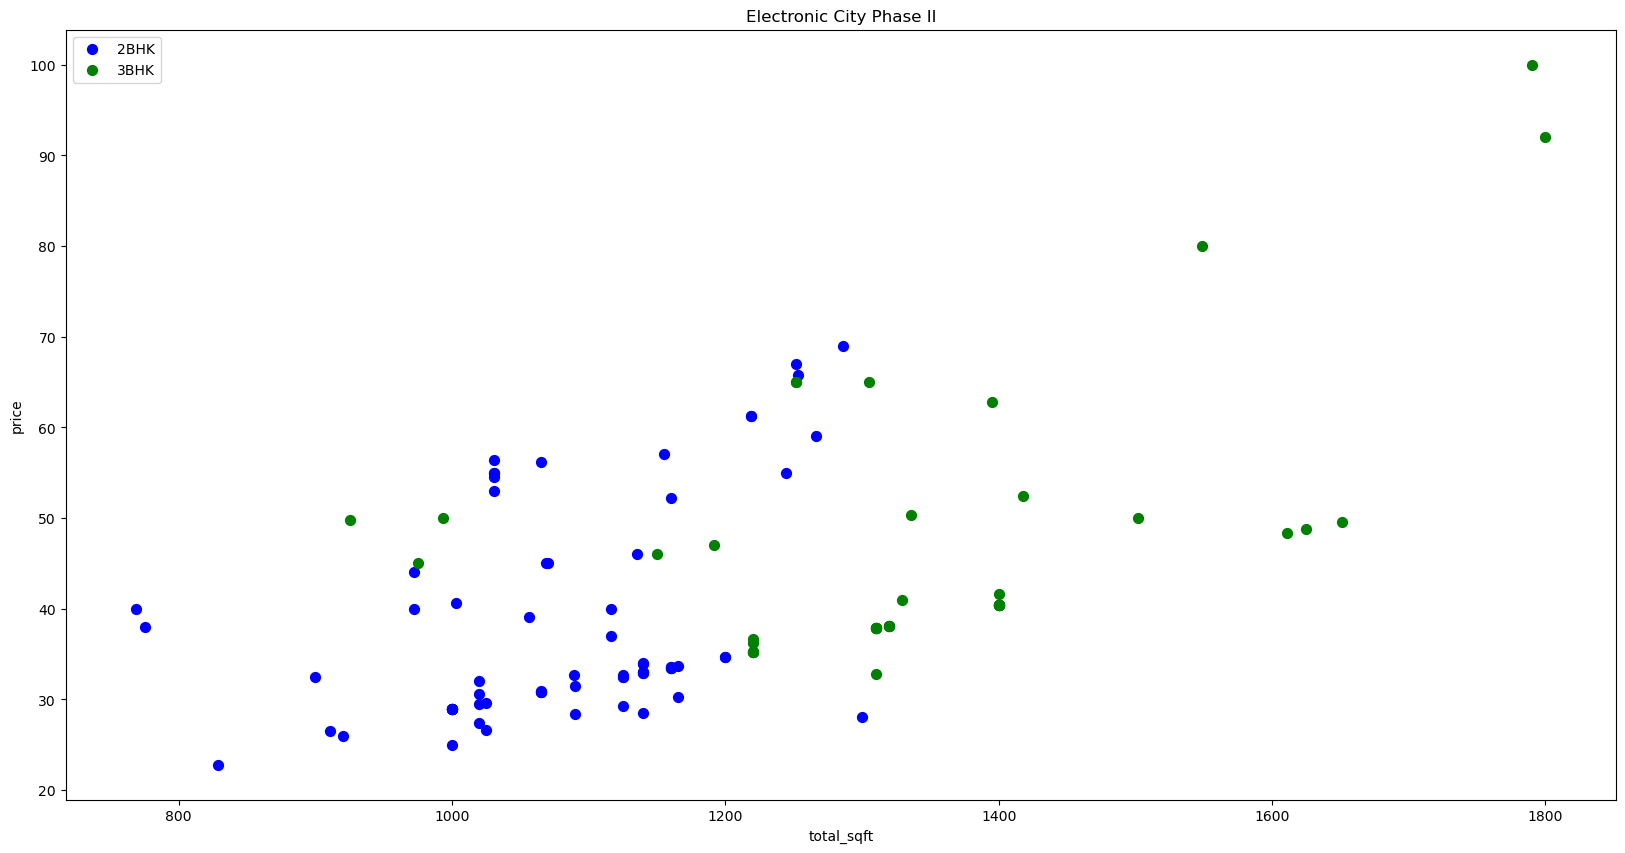

In [35]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) &(df.bhk==2)]
    bhk3=df[(df.location==location) &(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3BHK',s=50)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,'Electronic City Phase II')

In [36]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stat={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk]={
                'mean':np.mean(bhk_df.price_per_feet),
            'std':np.std(bhk_df.price_per_feet),
            'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'): 
            stat=bhk_stat.get(bhk-1)
            if stat and stat['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_feet<(stat['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 8)

In [37]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [38]:
df9.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_feet
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,2,11983.805668


In [39]:
df10=df9.drop(['size','price_per_feet'],axis='columns')
df10.head() #final df

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [62]:
dummies=pd.get_dummies(df10.location,dtype=int)

In [66]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df12=df11.drop('location',axis='columns')
df12.head(3)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y=df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression
lr_hp=LinearRegression()
lr_hp.fit(X_train,y_train)
lr_hp.score(X_test,y_test)

0.8454334113886329

In [77]:
#k-fold cross validation => used for validating or evaluate the performance of the model
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82422698, 0.77159854, 0.8512903 , 0.80898801, 0.83614922])

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algoname,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algoname,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.819043,{'fit_intercept': False}
1,lasso,0.687520,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.715019,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [92]:
def predict_price(location,sqft,bhk,bath,balcony):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=balcony
    x[3]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_hp.predict([x])[0]


In [93]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [110]:
predict_price('KR Puram',1500,3,2,2)

C:\Users\abish\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.90455776568918

In [102]:
predict_price('1st Phase JP Nagar',1000,2,2,0)

C:\Users\abish\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.54630140882001

In [112]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_hp,f)

In [114]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))